In [4]:
import sys
import os
import numpy as np
import pandas as pd
import pickle
from tqdm import tqdm
sys.path.insert(1,'/data1/gridsan/groups/manthiram_lab/Utils')
sys.path.insert(1,'/data1/gridsan/groups/manthiram_lab/DFT_script_gen')

from utils import make_xyz_from_array, GetCoordsFromMolBlock,mol_with_atom_index
from dft_script_gen import gaussian,gen_gauss_sub_script
from convertxyz import mk_smi_file, mk_xyz_from_smiles_string, get_xyz_from_mol, write_xyz_from_xyz_arr
import xyz2mol as x2m

from rdkit import Chem
from rdkit.Chem import AllChem, Draw
from rdkit.Chem.rdchem import Mol
from rdkit.Chem.Draw import rdMolDraw2D,MolToImage,ShowMol,MolsToGridImage


In [5]:
df=pd.read_csv('../sheets/Ylides_YlideRads_Cleaned.csv')
y=df['Ylides'].to_list()
yr=df['Ylides Rad'].to_list()
yh=df['Ylides H'].to_list()

In [6]:
#Get Charges on each of the ylides, ylide_rads, and ylide_h
charges=[]
suffix= ['','_rad','_h']
smi_dict={''    :y,
  '_rad' : yr,
  '_h'   : yh
 }
for i, suff in enumerate(suffix):
    charges.append([])
    for j,v in enumerate(tqdm(smi_dict[suff])):
        mol=Chem.MolFromSmiles(v)
        charges[i].append(Chem.rdmolops.GetFormalCharge(mol))

100%|██████████| 19097/19097 [00:01<00:00, 15860.34it/s]


In [7]:
with open("../pickled_data/charges.pkl", "wb") as file:
    pickle.dump(charges, file)

In [4]:
with open('../../../../../manthiram_lab_shared/vHTP/Code/ylide/Library/python_scripts/dicts/failed_dict_gas_0629.pkl',"rb") as file: #This may have been overwritten in the data_analysis code
    pickle_off = pickle.Unpickler(file)
    y_failed = pickle_off.load()

# Make Gas Phase Scripts

## First make scripts for ylide and ylide_h

In [68]:
actually_make_dirs=True
if actually_make_dirs:

    z=7
    cwd=os.getcwd()
    calc_folder='Calcs'
    #for i, s in enumerate(tqdm(y)):

    functional='M062X'
    basis= 'Def2TZVP'
    solvorgas='gas' #This should only be used for gas phase, since we need the gas phase pre opt for solv
    solvmethod='SMD'
    solvent='acetonitrile'
    cwd='/data1/gridsan/jmaalouf/vHTP/Code/ylide/Library'
    shared_dir='/data1/gridsan/groups/manthiram_lab/vHTP/Code/ylide/Library/Calcs'
    
    molecules_ids=y_h_failed['ylide_h']
    
    #for i, s in enumerate(tqdm(range(1000,10000))):
    for i, s in enumerate(tqdm(molecules_ids)):
        assert solvorgas == 'gas' or solvorgas=='solv','SOLVORGAS NOT SET TO A VALID VALUE'

        suffix= ['',] #For solv gase you probably dont need _rad 
        
        smi_dict={
        ''     : y,
        '_rad' : yr,
        '_h'   : yh
         }
        
        for j, suff in enumerate(suffix): 


            if solvorgas=='gas':
                basepath=f'{shared_dir}/{str(s).zfill(z)}/ylide{suff}/{functional}/{basis}/gas/'

            elif solvorgas=='solv':

                try:
                    solvent
                except NameError:
                    raise Exception('PLEASE SPECIFY A SOLVENT')

                basepath=f'{shared_dir}/{str(s).zfill(z)}/ylide{suff}/{functional}/{basis}/{solvent}/{solvmethod}/'
                
            #os.chdir(shared_dir)
            os.makedirs(basepath,exist_ok=True)
            #os.chdir(cwd)

            smi= smi_dict[suff][s]
            path=f'{basepath}/{str(s).zfill(z)}_ylide{suff}'
            
            try:
                
                if s in y_h_failed['ylide_h']:
                    #mk_smi_file(smi,path)
                    mk_xyz_from_smiles_string(smi,path,numConfs=100) #Make the .com file
                    gaussian(path,smi,functional=functional,basis=basis,solvorgas=solvorgas,solvmethod=solvmethod,solvent=solvent,mem='180GB',n_proc_shared=48)
                    gen_gauss_sub_script(path) #Make the .sh file
            except Exception as e:
                print(e)
                exc_type, exc_obj, exc_tb = sys.exc_info()
                fname = os.path.split(exc_tb.tb_frame.f_code.co_filename)[1]
                print(exc_type, fname, exc_tb.tb_lineno)
                print(f'ERROR WITH  MOLECULE NUMBER {s} smiles {path}')

  0%|          | 0/78 [00:00<?, ?it/s]

CHIRAL STEROCHEMISTRY REMOVED, SMILES=C[N+](C)(C)[NH]C(=O)C[CH]1C[CH]2C=C[CH]1C2


  4%|▍         | 3/78 [00:11<05:09,  4.13s/it]

CHIRAL STEROCHEMISTRY REMOVED, SMILES=C[N+](C)(C)[NH]C(=O)CC1[CH]2C=C[CH]1C(=O)C2


  5%|▌         | 4/78 [00:16<05:17,  4.29s/it]

CHIRAL STEROCHEMISTRY REMOVED, SMILES=C[N+](C)(C)[NH]C(=O)CC[CH]1C[CH]2C=C[CH]1C2


 21%|██        | 16/78 [01:03<03:24,  3.30s/it]

CHIRAL STEROCHEMISTRY REMOVED, SMILES=C[CH]1C(=O)[CH]2C=C[CH]1C2CC(=O)[NH][N+](C)(C)C


 24%|██▍       | 19/78 [01:17<03:53,  3.96s/it]

CHIRAL STEROCHEMISTRY REMOVED, SMILES=CC1(C)C(CC(=O)[NH][N+](C)(C)C)[CH]2CC[CH]1C2


 56%|█████▋    | 44/78 [03:03<02:01,  3.57s/it]

CHIRAL STEROCHEMISTRY REMOVED, SMILES=C[N+](C)(C)[NH]C(=O)CC1C[CH]2C[CH]1[CH]1CCC[CH]21


 68%|██████▊   | 53/78 [03:46<01:35,  3.82s/it]

CHIRAL STEROCHEMISTRY REMOVED, SMILES=C[C]12CO[C]3(CC(=O)[NH][N+](C)(C)C)C[CH]1CC[CH]32


100%|██████████| 78/78 [05:38<00:00,  4.34s/it]


# Generate Ylide Radical Gas Phase Scripts Using Optimized Ylide_H Scripts

### Load Relevant Arrays with info on molecules

In [11]:
with open("../pickled_data/atom_coords.pkl","rb") as file: #This may have been overwritten in the data_analysis code
    pickle_off = pickle.Unpickler(file)
    atom_coords = pickle_off.load()
    
with open("../pickled_data/atom_coords_gas.pkl","rb") as file: #coords after gas phase calculations have run
    pickle_off = pickle.Unpickler(file)
    atom_coords_fully_opt = pickle_off.load()
    
with open("../pickled_data/atom_labels.pkl","rb") as file:
    pickle_off = pickle.Unpickler(file)
    atom_labels = pickle_off.load()
    
with open("../pickled_data/charges.pkl","rb") as file:
    pickle_off = pickle.Unpickler(file)
    charges = pickle_off.load()

In [9]:
def check_ylide(mol):
    ylide_carbo=Chem.MolFromSmiles('O=CN[N+](C)(C)C')
    return mol.HasSubstructMatch(ylide_carbo)
    

In [15]:
with open("mols_cleaned.pkl", "wb") as file:
    pickle.dump(mols, file)

In [13]:
temp_list=[]
for i,m in enumerate(mols):
    if not check_ylide(m):
        temp_list.append(i)

In [17]:
len(failed_yh_to_yr)

237

In [76]:
temp_list

[15,
 77,
 99,
 100,
 113,
 141,
 203,
 204,
 213,
 327,
 467,
 648,
 675,
 771,
 775,
 778,
 779,
 869,
 1036,
 1104,
 1310,
 1311,
 1439,
 1440,
 1848,
 1849,
 1858,
 1944,
 2170,
 2219,
 2367,
 2370,
 2451,
 2458,
 2499,
 2640,
 2776,
 2937,
 2939,
 3423,
 3996,
 4002,
 4143,
 4369,
 4370,
 4373,
 4535,
 4565,
 4690,
 4704,
 4777,
 4947,
 5175,
 5176,
 5183,
 5184,
 5241,
 5242,
 5243,
 5245,
 5445,
 5446,
 5543,
 5544,
 5595,
 5596,
 5840,
 5877,
 6039,
 6329,
 6330,
 6333,
 6338,
 6339,
 6343,
 6344,
 6347,
 6466,
 6493,
 6603,
 6830,
 6890,
 6926,
 7021,
 7064,
 7295,
 7297,
 7485,
 7490,
 7664,
 7665,
 7672,
 7788,
 7789,
 7908,
 8235,
 8392,
 8393,
 8394,
 8397,
 8399,
 8642,
 8795,
 8797,
 8799]

## Make list of Ylide_H mols with optimized geometries

In [19]:
"""
This block of code gets the optimized y_h geometry, then converts the xyz array into a rdkit mol object
We need the mole object to be able to subsequently remove the H atom and make an ylide_rad starting geometry.

If the conversion fails then the geometry is generating using the function mk_xyz_from_smiles_string()

Common Erros: atom coords were not extracted so I am passing in [] which will throw an error. Need to fix in
Ylide_Data_Analysis
"""
yr_redo=[]
failed_yh_to_yr=[]
ylide_carbo=Chem.MolFromSmiles('O=CN[N+](C)(C)C')
n=len(atom_coords[2])
mols=[]
start=0
stop=10000
for i,s in enumerate(tqdm(range(start,stop))):

    try:
        charge=charges[2][s]
        make_xyz_from_array('temp_xyz',atom_coords_fully_opt[2][s],atom_labels[2][s],include_charge=True,charge=charge)
        atoms, charge_read, coordinates = x2m.read_xyz_file('temp_xyz.xyz') 
        mol = x2m.xyz2mol(atoms, coordinates, charge=charge) #Can also use charge read defined on the previous line
        if mol[0].HasSubstructMatch(ylide_carbo):
            mols.append(mol[0])
        else:
            yr_redo.append(s)
            failed_yh_to_yr.append(s)
            temp_mol=mk_xyz_from_smiles_string(yh[s],'',numConfs=100,conf_id=False,randomseed=0xf00d,return_mol=True,write_file=False)
            mols.append(temp_mol)
    except Exception as e:
        
        failed_yh_to_yr.append(s) #This is mainly for record keeping at this point

        #print(f'{i}: DIDNT WORK,ADDING [Ar]')  
        #mols.append(Chem.MolFromSmiles('[Ar]')) #This should really be changed to append ylide_h mols that is MMMF optimized instead of [Ar]
        
        exc_type, exc_obj, exc_tb = sys.exc_info()
        fname = os.path.split(exc_tb.tb_frame.f_code.co_filename)[1]
        print(e)       
        print(exc_type, fname, f'Line Number:{exc_tb.tb_lineno}')
        
        print(f'{s}: DIDNT WORK,ADDING Y_H MOL FROM SMILES STRING')
        temp_mol=mk_xyz_from_smiles_string(yh[s],'',numConfs=100,conf_id=False,randomseed=0xf00d,return_mol=True,write_file=False)
        mols.append(temp_mol)

        
#All the errors are from molecules that did not converge
    
if os.path.exists('temp_xyz.xyz'):
    os.remove('temp_xyz.xyz')
else:
    print("The file does not exist")
    


  4%|▍         | 402/10000 [00:04<01:30, 106.23it/s]

Valence of atom 8 is 5 which bigger than allowed max 4 . Stopping
('Valence of atom', 8, 'is', 5, 'which bigger than allowed max', 4, '. Stopping')
<class 'RuntimeError'> <ipython-input-19-f29b74cd61ea> Line Number:23
419: DIDNT WORK,ADDING Y_H MOL FROM SMILES STRING


  5%|▍         | 460/10000 [00:18<18:44,  8.49it/s] 

Valence of atom 8 is 2 which bigger than allowed max 1 . Stopping
('Valence of atom', 8, 'is', 2, 'which bigger than allowed max', 1, '. Stopping')
<class 'RuntimeError'> <ipython-input-19-f29b74cd61ea> Line Number:23
478: DIDNT WORK,ADDING Y_H MOL FROM SMILES STRING


  6%|▌         | 566/10000 [00:21<05:45, 27.33it/s]

Valence of atom 10 is 5 which bigger than allowed max 4 . Stopping
('Valence of atom', 10, 'is', 5, 'which bigger than allowed max', 4, '. Stopping')
<class 'RuntimeError'> <ipython-input-19-f29b74cd61ea> Line Number:23
581: DIDNT WORK,ADDING Y_H MOL FROM SMILES STRING


  6%|▌         | 582/10000 [00:22<07:08, 21.99it/s]

Valence of atom 10 is 5 which bigger than allowed max 4 . Stopping
('Valence of atom', 10, 'is', 5, 'which bigger than allowed max', 4, '. Stopping')
<class 'RuntimeError'> <ipython-input-19-f29b74cd61ea> Line Number:23
583: DIDNT WORK,ADDING Y_H MOL FROM SMILES STRING


  8%|▊         | 837/10000 [00:28<01:43, 88.58it/s]

Valence of atom 9 is 5 which bigger than allowed max 4 . Stopping
('Valence of atom', 9, 'is', 5, 'which bigger than allowed max', 4, '. Stopping')
<class 'RuntimeError'> <ipython-input-19-f29b74cd61ea> Line Number:23
848: DIDNT WORK,ADDING Y_H MOL FROM SMILES STRING


  8%|▊         | 849/10000 [01:15<3:00:20,  1.18s/it]

Valence of atom 9 is 2 which bigger than allowed max 1 . Stopping
('Valence of atom', 9, 'is', 2, 'which bigger than allowed max', 1, '. Stopping')
<class 'RuntimeError'> <ipython-input-19-f29b74cd61ea> Line Number:23
852: DIDNT WORK,ADDING Y_H MOL FROM SMILES STRING


  9%|▊         | 871/10000 [01:15<1:31:25,  1.66it/s]

Valence of atom 8 is 5 which bigger than allowed max 4 . Stopping
('Valence of atom', 8, 'is', 5, 'which bigger than allowed max', 4, '. Stopping')
<class 'RuntimeError'> <ipython-input-19-f29b74cd61ea> Line Number:23
887: DIDNT WORK,ADDING Y_H MOL FROM SMILES STRING


 10%|▉         | 959/10000 [01:17<17:06,  8.81it/s]  

Valence of atom 9 is 2 which bigger than allowed max 1 . Stopping
('Valence of atom', 9, 'is', 2, 'which bigger than allowed max', 1, '. Stopping')
<class 'RuntimeError'> <ipython-input-19-f29b74cd61ea> Line Number:23
970: DIDNT WORK,ADDING Y_H MOL FROM SMILES STRING
Valence of atom 2 is 2 which bigger than allowed max 1 . Stopping
('Valence of atom', 2, 'is', 2, 'which bigger than allowed max', 1, '. Stopping')
<class 'RuntimeError'> <ipython-input-19-f29b74cd61ea> Line Number:23
971: DIDNT WORK,ADDING Y_H MOL FROM SMILES STRING


 12%|█▏        | 1218/10000 [01:26<09:44, 15.03it/s]

Valence of atom 9 is 2 which bigger than allowed max 1 . Stopping
('Valence of atom', 9, 'is', 2, 'which bigger than allowed max', 1, '. Stopping')
<class 'RuntimeError'> <ipython-input-19-f29b74cd61ea> Line Number:23
1219: DIDNT WORK,ADDING Y_H MOL FROM SMILES STRING


 13%|█▎        | 1321/10000 [01:27<01:48, 80.20it/s]

Valence of atom 2 is 2 which bigger than allowed max 1 . Stopping
('Valence of atom', 2, 'is', 2, 'which bigger than allowed max', 1, '. Stopping')
<class 'RuntimeError'> <ipython-input-19-f29b74cd61ea> Line Number:23
1335: DIDNT WORK,ADDING Y_H MOL FROM SMILES STRING


 14%|█▍        | 1431/10000 [01:29<01:19, 107.16it/s]

Valence of atom 9 is 2 which bigger than allowed max 1 . Stopping
('Valence of atom', 9, 'is', 2, 'which bigger than allowed max', 1, '. Stopping')
<class 'RuntimeError'> <ipython-input-19-f29b74cd61ea> Line Number:23
1441: DIDNT WORK,ADDING Y_H MOL FROM SMILES STRING
Valence of atom 2 is 2 which bigger than allowed max 1 . Stopping
('Valence of atom', 2, 'is', 2, 'which bigger than allowed max', 1, '. Stopping')
<class 'RuntimeError'> <ipython-input-19-f29b74cd61ea> Line Number:23
1442: DIDNT WORK,ADDING Y_H MOL FROM SMILES STRING
Valence of atom 2 is 2 which bigger than allowed max 1 . Stopping
('Valence of atom', 2, 'is', 2, 'which bigger than allowed max', 1, '. Stopping')
<class 'RuntimeError'> <ipython-input-19-f29b74cd61ea> Line Number:23
1444: DIDNT WORK,ADDING Y_H MOL FROM SMILES STRING
Valence of atom 2 is 2 which bigger than allowed max 1 . Stopping
('Valence of atom', 2, 'is', 2, 'which bigger than allowed max', 1, '. Stopping')
<class 'RuntimeError'> <ipython-input-19-f29b

 16%|█▌        | 1591/10000 [01:32<01:15, 111.19it/s]

Valence of atom 10 is 2 which bigger than allowed max 1 . Stopping
('Valence of atom', 10, 'is', 2, 'which bigger than allowed max', 1, '. Stopping')
<class 'RuntimeError'> <ipython-input-19-f29b74cd61ea> Line Number:23
1606: DIDNT WORK,ADDING Y_H MOL FROM SMILES STRING


 16%|█▌        | 1610/10000 [01:32<02:01, 69.09it/s] 

Valence of atom 10 is 2 which bigger than allowed max 1 . Stopping
('Valence of atom', 10, 'is', 2, 'which bigger than allowed max', 1, '. Stopping')
<class 'RuntimeError'> <ipython-input-19-f29b74cd61ea> Line Number:23
1610: DIDNT WORK,ADDING Y_H MOL FROM SMILES STRING
Valence of atom 10 is 2 which bigger than allowed max 1 . Stopping
('Valence of atom', 10, 'is', 2, 'which bigger than allowed max', 1, '. Stopping')
<class 'RuntimeError'> <ipython-input-19-f29b74cd61ea> Line Number:23
1611: DIDNT WORK,ADDING Y_H MOL FROM SMILES STRING


 16%|█▋        | 1647/10000 [01:34<03:09, 44.16it/s]

list index out of range
<class 'IndexError'> <ipython-input-19-f29b74cd61ea> Line Number:24
1651: DIDNT WORK,ADDING Y_H MOL FROM SMILES STRING


 18%|█▊        | 1790/10000 [01:40<10:44, 12.74it/s]

Valence of atom 8 is 2 which bigger than allowed max 1 . Stopping
('Valence of atom', 8, 'is', 2, 'which bigger than allowed max', 1, '. Stopping')
<class 'RuntimeError'> <ipython-input-19-f29b74cd61ea> Line Number:23
1796: DIDNT WORK,ADDING Y_H MOL FROM SMILES STRING
Valence of atom 8 is 2 which bigger than allowed max 1 . Stopping
('Valence of atom', 8, 'is', 2, 'which bigger than allowed max', 1, '. Stopping')
<class 'RuntimeError'> <ipython-input-19-f29b74cd61ea> Line Number:23
1797: DIDNT WORK,ADDING Y_H MOL FROM SMILES STRING


 19%|█▉        | 1896/10000 [01:42<03:32, 38.20it/s]

Valence of atom 10 is 2 which bigger than allowed max 1 . Stopping
('Valence of atom', 10, 'is', 2, 'which bigger than allowed max', 1, '. Stopping')
<class 'RuntimeError'> <ipython-input-19-f29b74cd61ea> Line Number:23
1904: DIDNT WORK,ADDING Y_H MOL FROM SMILES STRING
Valence of atom 10 is 2 which bigger than allowed max 1 . Stopping
('Valence of atom', 10, 'is', 2, 'which bigger than allowed max', 1, '. Stopping')
<class 'RuntimeError'> <ipython-input-19-f29b74cd61ea> Line Number:23
1905: DIDNT WORK,ADDING Y_H MOL FROM SMILES STRING


 20%|██        | 2028/10000 [01:44<01:18, 101.11it/s]

Valence of atom 10 is 2 which bigger than allowed max 1 . Stopping
('Valence of atom', 10, 'is', 2, 'which bigger than allowed max', 1, '. Stopping')
<class 'RuntimeError'> <ipython-input-19-f29b74cd61ea> Line Number:23
2038: DIDNT WORK,ADDING Y_H MOL FROM SMILES STRING


 23%|██▎       | 2295/10000 [01:48<01:00, 128.03it/s]

Valence of atom 2 is 5 which bigger than allowed max 4 . Stopping
('Valence of atom', 2, 'is', 5, 'which bigger than allowed max', 4, '. Stopping')
<class 'RuntimeError'> <ipython-input-19-f29b74cd61ea> Line Number:23
2307: DIDNT WORK,ADDING Y_H MOL FROM SMILES STRING


 24%|██▎       | 2356/10000 [01:51<03:23, 37.65it/s] 

Valence of atom 8 is 3 which bigger than allowed max 1 . Stopping
('Valence of atom', 8, 'is', 3, 'which bigger than allowed max', 1, '. Stopping')
<class 'RuntimeError'> <ipython-input-19-f29b74cd61ea> Line Number:23
2366: DIDNT WORK,ADDING Y_H MOL FROM SMILES STRING


 24%|██▍       | 2433/10000 [01:51<01:35, 79.00it/s]

Valence of atom 9 is 5 which bigger than allowed max 4 . Stopping
('Valence of atom', 9, 'is', 5, 'which bigger than allowed max', 4, '. Stopping')
<class 'RuntimeError'> <ipython-input-19-f29b74cd61ea> Line Number:23
2441: DIDNT WORK,ADDING Y_H MOL FROM SMILES STRING


 24%|██▍       | 2447/10000 [01:54<07:03, 17.84it/s]

Valence of atom 3 is 2 which bigger than allowed max 1 . Stopping
('Valence of atom', 3, 'is', 2, 'which bigger than allowed max', 1, '. Stopping')
<class 'RuntimeError'> <ipython-input-19-f29b74cd61ea> Line Number:23
2450: DIDNT WORK,ADDING Y_H MOL FROM SMILES STRING
Valence of atom 0 is 5 which bigger than allowed max 4 . Stopping
('Valence of atom', 0, 'is', 5, 'which bigger than allowed max', 4, '. Stopping')
<class 'RuntimeError'> <ipython-input-19-f29b74cd61ea> Line Number:23
2454: DIDNT WORK,ADDING Y_H MOL FROM SMILES STRING
Valence of atom 0 is 5 which bigger than allowed max 4 . Stopping
('Valence of atom', 0, 'is', 5, 'which bigger than allowed max', 4, '. Stopping')
<class 'RuntimeError'> <ipython-input-19-f29b74cd61ea> Line Number:23
2455: DIDNT WORK,ADDING Y_H MOL FROM SMILES STRING
Valence of atom 2 is 2 which bigger than allowed max 1 . Stopping
('Valence of atom', 2, 'is', 2, 'which bigger than allowed max', 1, '. Stopping')
<class 'RuntimeError'> <ipython-input-19-f29b

 25%|██▍       | 2457/10000 [01:56<11:47, 10.66it/s]

Valence of atom 3 is 2 which bigger than allowed max 1 . Stopping
('Valence of atom', 3, 'is', 2, 'which bigger than allowed max', 1, '. Stopping')
<class 'RuntimeError'> <ipython-input-19-f29b74cd61ea> Line Number:23
2458: DIDNT WORK,ADDING Y_H MOL FROM SMILES STRING


 26%|██▋       | 2647/10000 [01:57<01:27, 84.45it/s] 

Valence of atom 10 is 2 which bigger than allowed max 1 . Stopping
('Valence of atom', 10, 'is', 2, 'which bigger than allowed max', 1, '. Stopping')
<class 'RuntimeError'> <ipython-input-19-f29b74cd61ea> Line Number:23
2664: DIDNT WORK,ADDING Y_H MOL FROM SMILES STRING


 27%|██▋       | 2665/10000 [01:58<01:54, 64.25it/s]

Valence of atom 11 is 2 which bigger than allowed max 1 . Stopping
('Valence of atom', 11, 'is', 2, 'which bigger than allowed max', 1, '. Stopping')
<class 'RuntimeError'> <ipython-input-19-f29b74cd61ea> Line Number:23
2665: DIDNT WORK,ADDING Y_H MOL FROM SMILES STRING
Valence of atom 3 is 2 which bigger than allowed max 1 . Stopping
('Valence of atom', 3, 'is', 2, 'which bigger than allowed max', 1, '. Stopping')
<class 'RuntimeError'> <ipython-input-19-f29b74cd61ea> Line Number:23
2668: DIDNT WORK,ADDING Y_H MOL FROM SMILES STRING


 29%|██▊       | 2853/10000 [02:02<04:16, 27.83it/s] 

list index out of range
<class 'IndexError'> <ipython-input-19-f29b74cd61ea> Line Number:24
2860: DIDNT WORK,ADDING Y_H MOL FROM SMILES STRING
list index out of range
<class 'IndexError'> <ipython-input-19-f29b74cd61ea> Line Number:24
2862: DIDNT WORK,ADDING Y_H MOL FROM SMILES STRING


 29%|██▉       | 2919/10000 [02:05<04:08, 28.44it/s]

Valence of atom 8 is 2 which bigger than allowed max 1 . Stopping
('Valence of atom', 8, 'is', 2, 'which bigger than allowed max', 1, '. Stopping')
<class 'RuntimeError'> <ipython-input-19-f29b74cd61ea> Line Number:23
2926: DIDNT WORK,ADDING Y_H MOL FROM SMILES STRING
Valence of atom 8 is 2 which bigger than allowed max 1 . Stopping
('Valence of atom', 8, 'is', 2, 'which bigger than allowed max', 1, '. Stopping')
<class 'RuntimeError'> <ipython-input-19-f29b74cd61ea> Line Number:23
2927: DIDNT WORK,ADDING Y_H MOL FROM SMILES STRING
Valence of atom 8 is 2 which bigger than allowed max 1 . Stopping
('Valence of atom', 8, 'is', 2, 'which bigger than allowed max', 1, '. Stopping')
<class 'RuntimeError'> <ipython-input-19-f29b74cd61ea> Line Number:23
2928: DIDNT WORK,ADDING Y_H MOL FROM SMILES STRING
Valence of atom 11 is 2 which bigger than allowed max 1 . Stopping
('Valence of atom', 11, 'is', 2, 'which bigger than allowed max', 1, '. Stopping')
<class 'RuntimeError'> <ipython-input-19-f2

 30%|███       | 3018/10000 [02:09<02:42, 42.86it/s]

Valence of atom 11 is 2 which bigger than allowed max 1 . Stopping
('Valence of atom', 11, 'is', 2, 'which bigger than allowed max', 1, '. Stopping')
<class 'RuntimeError'> <ipython-input-19-f29b74cd61ea> Line Number:23
3020: DIDNT WORK,ADDING Y_H MOL FROM SMILES STRING
Valence of atom 11 is 2 which bigger than allowed max 1 . Stopping
('Valence of atom', 11, 'is', 2, 'which bigger than allowed max', 1, '. Stopping')
<class 'RuntimeError'> <ipython-input-19-f29b74cd61ea> Line Number:23
3021: DIDNT WORK,ADDING Y_H MOL FROM SMILES STRING


 31%|███       | 3074/10000 [02:10<02:39, 43.40it/s]

Valence of atom 4 is 5 which bigger than allowed max 4 . Stopping
('Valence of atom', 4, 'is', 5, 'which bigger than allowed max', 4, '. Stopping')
<class 'RuntimeError'> <ipython-input-19-f29b74cd61ea> Line Number:23
3084: DIDNT WORK,ADDING Y_H MOL FROM SMILES STRING


 32%|███▏      | 3190/10000 [02:36<11:25,  9.94it/s]  

Valence of atom 8 is 2 which bigger than allowed max 1 . Stopping
('Valence of atom', 8, 'is', 2, 'which bigger than allowed max', 1, '. Stopping')
<class 'RuntimeError'> <ipython-input-19-f29b74cd61ea> Line Number:23
3192: DIDNT WORK,ADDING Y_H MOL FROM SMILES STRING
Valence of atom 9 is 2 which bigger than allowed max 1 . Stopping
('Valence of atom', 9, 'is', 2, 'which bigger than allowed max', 1, '. Stopping')
<class 'RuntimeError'> <ipython-input-19-f29b74cd61ea> Line Number:23
3193: DIDNT WORK,ADDING Y_H MOL FROM SMILES STRING
Valence of atom 2 is 2 which bigger than allowed max 1 . Stopping
('Valence of atom', 2, 'is', 2, 'which bigger than allowed max', 1, '. Stopping')
<class 'RuntimeError'> <ipython-input-19-f29b74cd61ea> Line Number:23
3194: DIDNT WORK,ADDING Y_H MOL FROM SMILES STRING


 37%|███▋      | 3653/10000 [02:49<03:53, 27.21it/s]

Valence of atom 8 is 2 which bigger than allowed max 1 . Stopping
('Valence of atom', 8, 'is', 2, 'which bigger than allowed max', 1, '. Stopping')
<class 'RuntimeError'> <ipython-input-19-f29b74cd61ea> Line Number:23
3658: DIDNT WORK,ADDING Y_H MOL FROM SMILES STRING


 38%|███▊      | 3786/10000 [02:51<02:26, 42.49it/s]

Valence of atom 8 is 2 which bigger than allowed max 1 . Stopping
('Valence of atom', 8, 'is', 2, 'which bigger than allowed max', 1, '. Stopping')
<class 'RuntimeError'> <ipython-input-19-f29b74cd61ea> Line Number:23
3793: DIDNT WORK,ADDING Y_H MOL FROM SMILES STRING


 38%|███▊      | 3849/10000 [02:51<01:29, 68.43it/s]

Valence of atom 10 is 2 which bigger than allowed max 1 . Stopping
('Valence of atom', 10, 'is', 2, 'which bigger than allowed max', 1, '. Stopping')
<class 'RuntimeError'> <ipython-input-19-f29b74cd61ea> Line Number:23
3860: DIDNT WORK,ADDING Y_H MOL FROM SMILES STRING


 40%|████      | 4029/10000 [02:55<01:13, 80.93it/s]

Valence of atom 12 is 2 which bigger than allowed max 1 . Stopping
('Valence of atom', 12, 'is', 2, 'which bigger than allowed max', 1, '. Stopping')
<class 'RuntimeError'> <ipython-input-19-f29b74cd61ea> Line Number:23
4041: DIDNT WORK,ADDING Y_H MOL FROM SMILES STRING
Valence of atom 13 is 2 which bigger than allowed max 1 . Stopping
('Valence of atom', 13, 'is', 2, 'which bigger than allowed max', 1, '. Stopping')
<class 'RuntimeError'> <ipython-input-19-f29b74cd61ea> Line Number:23
4042: DIDNT WORK,ADDING Y_H MOL FROM SMILES STRING


 40%|████      | 4045/10000 [02:56<03:18, 29.98it/s]

Valence of atom 11 is 2 which bigger than allowed max 1 . Stopping
('Valence of atom', 11, 'is', 2, 'which bigger than allowed max', 1, '. Stopping')
<class 'RuntimeError'> <ipython-input-19-f29b74cd61ea> Line Number:23
4045: DIDNT WORK,ADDING Y_H MOL FROM SMILES STRING


 41%|████      | 4122/10000 [02:57<01:50, 53.10it/s]

Valence of atom 10 is 2 which bigger than allowed max 1 . Stopping
('Valence of atom', 10, 'is', 2, 'which bigger than allowed max', 1, '. Stopping')
<class 'RuntimeError'> <ipython-input-19-f29b74cd61ea> Line Number:23
4129: DIDNT WORK,ADDING Y_H MOL FROM SMILES STRING
Valence of atom 8 is 2 which bigger than allowed max 1 . Stopping
('Valence of atom', 8, 'is', 2, 'which bigger than allowed max', 1, '. Stopping')
<class 'RuntimeError'> <ipython-input-19-f29b74cd61ea> Line Number:23
4130: DIDNT WORK,ADDING Y_H MOL FROM SMILES STRING


 41%|████▏     | 4131/10000 [02:58<03:52, 25.20it/s]

Valence of atom 9 is 3 which bigger than allowed max 1 . Stopping
('Valence of atom', 9, 'is', 3, 'which bigger than allowed max', 1, '. Stopping')
<class 'RuntimeError'> <ipython-input-19-f29b74cd61ea> Line Number:23
4131: DIDNT WORK,ADDING Y_H MOL FROM SMILES STRING
Valence of atom 12 is 2 which bigger than allowed max 1 . Stopping
('Valence of atom', 12, 'is', 2, 'which bigger than allowed max', 1, '. Stopping')
<class 'RuntimeError'> <ipython-input-19-f29b74cd61ea> Line Number:23
4132: DIDNT WORK,ADDING Y_H MOL FROM SMILES STRING


 43%|████▎     | 4276/10000 [03:00<01:03, 89.70it/s]

Valence of atom 2 is 2 which bigger than allowed max 1 . Stopping
('Valence of atom', 2, 'is', 2, 'which bigger than allowed max', 1, '. Stopping')
<class 'RuntimeError'> <ipython-input-19-f29b74cd61ea> Line Number:23
4287: DIDNT WORK,ADDING Y_H MOL FROM SMILES STRING
Valence of atom 0 is 5 which bigger than allowed max 4 . Stopping
('Valence of atom', 0, 'is', 5, 'which bigger than allowed max', 4, '. Stopping')
<class 'RuntimeError'> <ipython-input-19-f29b74cd61ea> Line Number:23
4288: DIDNT WORK,ADDING Y_H MOL FROM SMILES STRING
Valence of atom 0 is 5 which bigger than allowed max 4 . Stopping
('Valence of atom', 0, 'is', 5, 'which bigger than allowed max', 4, '. Stopping')
<class 'RuntimeError'> <ipython-input-19-f29b74cd61ea> Line Number:23
4289: DIDNT WORK,ADDING Y_H MOL FROM SMILES STRING


 43%|████▎     | 4290/10000 [03:02<04:17, 22.15it/s]

Valence of atom 4 is 2 which bigger than allowed max 1 . Stopping
('Valence of atom', 4, 'is', 2, 'which bigger than allowed max', 1, '. Stopping')
<class 'RuntimeError'> <ipython-input-19-f29b74cd61ea> Line Number:23
4292: DIDNT WORK,ADDING Y_H MOL FROM SMILES STRING
Valence of atom 4 is 2 which bigger than allowed max 1 . Stopping
('Valence of atom', 4, 'is', 2, 'which bigger than allowed max', 1, '. Stopping')
<class 'RuntimeError'> <ipython-input-19-f29b74cd61ea> Line Number:23
4294: DIDNT WORK,ADDING Y_H MOL FROM SMILES STRING
Valence of atom 3 is 2 which bigger than allowed max 1 . Stopping
('Valence of atom', 3, 'is', 2, 'which bigger than allowed max', 1, '. Stopping')
<class 'RuntimeError'> <ipython-input-19-f29b74cd61ea> Line Number:23
4296: DIDNT WORK,ADDING Y_H MOL FROM SMILES STRING
Valence of atom 2 is 2 which bigger than allowed max 1 . Stopping
('Valence of atom', 2, 'is', 2, 'which bigger than allowed max', 1, '. Stopping')
<class 'RuntimeError'> <ipython-input-19-f29b

 44%|████▍     | 4419/10000 [03:05<01:20, 69.71it/s]

Valence of atom 8 is 2 which bigger than allowed max 1 . Stopping
('Valence of atom', 8, 'is', 2, 'which bigger than allowed max', 1, '. Stopping')
<class 'RuntimeError'> <ipython-input-19-f29b74cd61ea> Line Number:23
4431: DIDNT WORK,ADDING Y_H MOL FROM SMILES STRING
Valence of atom 9 is 2 which bigger than allowed max 1 . Stopping
('Valence of atom', 9, 'is', 2, 'which bigger than allowed max', 1, '. Stopping')
<class 'RuntimeError'> <ipython-input-19-f29b74cd61ea> Line Number:23
4432: DIDNT WORK,ADDING Y_H MOL FROM SMILES STRING


 47%|████▋     | 4670/10000 [03:08<00:33, 159.08it/s]

Valence of atom 8 is 3 which bigger than allowed max 1 . Stopping
('Valence of atom', 8, 'is', 3, 'which bigger than allowed max', 1, '. Stopping')
<class 'RuntimeError'> <ipython-input-19-f29b74cd61ea> Line Number:23
4683: DIDNT WORK,ADDING Y_H MOL FROM SMILES STRING
Valence of atom 12 is 2 which bigger than allowed max 1 . Stopping
('Valence of atom', 12, 'is', 2, 'which bigger than allowed max', 1, '. Stopping')
<class 'RuntimeError'> <ipython-input-19-f29b74cd61ea> Line Number:23
4684: DIDNT WORK,ADDING Y_H MOL FROM SMILES STRING


 50%|████▉     | 4966/10000 [03:11<00:28, 176.42it/s]

list index out of range
<class 'IndexError'> <ipython-input-19-f29b74cd61ea> Line Number:24
4981: DIDNT WORK,ADDING Y_H MOL FROM SMILES STRING


 50%|████▉     | 4999/10000 [03:14<03:33, 23.44it/s] 

list index out of range
<class 'IndexError'> <ipython-input-19-f29b74cd61ea> Line Number:24
5001: DIDNT WORK,ADDING Y_H MOL FROM SMILES STRING


 50%|█████     | 5043/10000 [03:18<06:36, 12.51it/s]

Valence of atom 8 is 3 which bigger than allowed max 1 . Stopping
('Valence of atom', 8, 'is', 3, 'which bigger than allowed max', 1, '. Stopping')
<class 'RuntimeError'> <ipython-input-19-f29b74cd61ea> Line Number:23
5051: DIDNT WORK,ADDING Y_H MOL FROM SMILES STRING
Valence of atom 8 is 3 which bigger than allowed max 1 . Stopping
('Valence of atom', 8, 'is', 3, 'which bigger than allowed max', 1, '. Stopping')
<class 'RuntimeError'> <ipython-input-19-f29b74cd61ea> Line Number:23
5052: DIDNT WORK,ADDING Y_H MOL FROM SMILES STRING


 51%|█████     | 5055/10000 [03:19<06:16, 13.13it/s]

Valence of atom 12 is 2 which bigger than allowed max 1 . Stopping
('Valence of atom', 12, 'is', 2, 'which bigger than allowed max', 1, '. Stopping')
<class 'RuntimeError'> <ipython-input-19-f29b74cd61ea> Line Number:23
5056: DIDNT WORK,ADDING Y_H MOL FROM SMILES STRING


 52%|█████▏    | 5162/10000 [03:21<02:11, 36.74it/s]

list index out of range
<class 'IndexError'> <ipython-input-19-f29b74cd61ea> Line Number:24
5171: DIDNT WORK,ADDING Y_H MOL FROM SMILES STRING


 54%|█████▎    | 5358/10000 [03:23<00:32, 140.77it/s]

list index out of range
<class 'IndexError'> <ipython-input-19-f29b74cd61ea> Line Number:24
5371: DIDNT WORK,ADDING Y_H MOL FROM SMILES STRING


 55%|█████▍    | 5464/10000 [03:28<01:23, 54.05it/s] 

Valence of atom 10 is 2 which bigger than allowed max 1 . Stopping
('Valence of atom', 10, 'is', 2, 'which bigger than allowed max', 1, '. Stopping')
<class 'RuntimeError'> <ipython-input-19-f29b74cd61ea> Line Number:23
5470: DIDNT WORK,ADDING Y_H MOL FROM SMILES STRING
Valence of atom 12 is 2 which bigger than allowed max 1 . Stopping
('Valence of atom', 12, 'is', 2, 'which bigger than allowed max', 1, '. Stopping')
<class 'RuntimeError'> <ipython-input-19-f29b74cd61ea> Line Number:23
5474: DIDNT WORK,ADDING Y_H MOL FROM SMILES STRING


 56%|█████▌    | 5584/10000 [03:33<03:17, 22.32it/s]

Valence of atom 8 is 2 which bigger than allowed max 1 . Stopping
('Valence of atom', 8, 'is', 2, 'which bigger than allowed max', 1, '. Stopping')
<class 'RuntimeError'> <ipython-input-19-f29b74cd61ea> Line Number:23
5595: DIDNT WORK,ADDING Y_H MOL FROM SMILES STRING


 56%|█████▌    | 5596/10000 [03:33<02:49, 25.93it/s]

Valence of atom 12 is 2 which bigger than allowed max 1 . Stopping
('Valence of atom', 12, 'is', 2, 'which bigger than allowed max', 1, '. Stopping')
<class 'RuntimeError'> <ipython-input-19-f29b74cd61ea> Line Number:23
5596: DIDNT WORK,ADDING Y_H MOL FROM SMILES STRING
Valence of atom 5 is 2 which bigger than allowed max 1 . Stopping
('Valence of atom', 5, 'is', 2, 'which bigger than allowed max', 1, '. Stopping')
<class 'RuntimeError'> <ipython-input-19-f29b74cd61ea> Line Number:23
5597: DIDNT WORK,ADDING Y_H MOL FROM SMILES STRING


 61%|██████▏   | 6126/10000 [03:42<00:31, 122.66it/s]

Valence of atom 13 is 2 which bigger than allowed max 1 . Stopping
('Valence of atom', 13, 'is', 2, 'which bigger than allowed max', 1, '. Stopping')
<class 'RuntimeError'> <ipython-input-19-f29b74cd61ea> Line Number:23
6134: DIDNT WORK,ADDING Y_H MOL FROM SMILES STRING
Valence of atom 9 is 2 which bigger than allowed max 1 . Stopping
('Valence of atom', 9, 'is', 2, 'which bigger than allowed max', 1, '. Stopping')
<class 'RuntimeError'> <ipython-input-19-f29b74cd61ea> Line Number:23
6140: DIDNT WORK,ADDING Y_H MOL FROM SMILES STRING


 61%|██████▏   | 6141/10000 [03:44<01:56, 33.26it/s] 

Valence of atom 7 is 5 which bigger than allowed max 4 . Stopping
('Valence of atom', 7, 'is', 5, 'which bigger than allowed max', 4, '. Stopping')
<class 'RuntimeError'> <ipython-input-19-f29b74cd61ea> Line Number:23
6141: DIDNT WORK,ADDING Y_H MOL FROM SMILES STRING


 62%|██████▏   | 6246/10000 [03:52<06:44,  9.29it/s]

Valence of atom 10 is 3 which bigger than allowed max 1 . Stopping
('Valence of atom', 10, 'is', 3, 'which bigger than allowed max', 1, '. Stopping')
<class 'RuntimeError'> <ipython-input-19-f29b74cd61ea> Line Number:23
6251: DIDNT WORK,ADDING Y_H MOL FROM SMILES STRING
Valence of atom 11 is 2 which bigger than allowed max 1 . Stopping
('Valence of atom', 11, 'is', 2, 'which bigger than allowed max', 1, '. Stopping')
<class 'RuntimeError'> <ipython-input-19-f29b74cd61ea> Line Number:23
6252: DIDNT WORK,ADDING Y_H MOL FROM SMILES STRING
Valence of atom 11 is 2 which bigger than allowed max 1 . Stopping
('Valence of atom', 11, 'is', 2, 'which bigger than allowed max', 1, '. Stopping')
<class 'RuntimeError'> <ipython-input-19-f29b74cd61ea> Line Number:23
6253: DIDNT WORK,ADDING Y_H MOL FROM SMILES STRING


 64%|██████▍   | 6450/10000 [03:57<02:09, 27.38it/s] 

Valence of atom 13 is 2 which bigger than allowed max 1 . Stopping
('Valence of atom', 13, 'is', 2, 'which bigger than allowed max', 1, '. Stopping')
<class 'RuntimeError'> <ipython-input-19-f29b74cd61ea> Line Number:23
6461: DIDNT WORK,ADDING Y_H MOL FROM SMILES STRING


 65%|██████▍   | 6462/10000 [03:58<02:51, 20.60it/s]

Valence of atom 3 is 2 which bigger than allowed max 1 . Stopping
('Valence of atom', 3, 'is', 2, 'which bigger than allowed max', 1, '. Stopping')
<class 'RuntimeError'> <ipython-input-19-f29b74cd61ea> Line Number:23
6470: DIDNT WORK,ADDING Y_H MOL FROM SMILES STRING


 66%|██████▌   | 6595/10000 [04:02<01:47, 31.69it/s]

Valence of atom 8 is 2 which bigger than allowed max 1 . Stopping
('Valence of atom', 8, 'is', 2, 'which bigger than allowed max', 1, '. Stopping')
<class 'RuntimeError'> <ipython-input-19-f29b74cd61ea> Line Number:23
6598: DIDNT WORK,ADDING Y_H MOL FROM SMILES STRING
Valence of atom 11 is 2 which bigger than allowed max 1 . Stopping
('Valence of atom', 11, 'is', 2, 'which bigger than allowed max', 1, '. Stopping')
<class 'RuntimeError'> <ipython-input-19-f29b74cd61ea> Line Number:23
6599: DIDNT WORK,ADDING Y_H MOL FROM SMILES STRING


 68%|██████▊   | 6835/10000 [04:06<00:24, 131.07it/s]

Valence of atom 10 is 3 which bigger than allowed max 1 . Stopping
('Valence of atom', 10, 'is', 3, 'which bigger than allowed max', 1, '. Stopping')
<class 'RuntimeError'> <ipython-input-19-f29b74cd61ea> Line Number:23
6843: DIDNT WORK,ADDING Y_H MOL FROM SMILES STRING
Valence of atom 14 is 2 which bigger than allowed max 1 . Stopping
('Valence of atom', 14, 'is', 2, 'which bigger than allowed max', 1, '. Stopping')
<class 'RuntimeError'> <ipython-input-19-f29b74cd61ea> Line Number:23
6850: DIDNT WORK,ADDING Y_H MOL FROM SMILES STRING


 69%|██████▊   | 6851/10000 [04:09<02:51, 18.33it/s] 

Valence of atom 13 is 2 which bigger than allowed max 1 . Stopping
('Valence of atom', 13, 'is', 2, 'which bigger than allowed max', 1, '. Stopping')
<class 'RuntimeError'> <ipython-input-19-f29b74cd61ea> Line Number:23
6851: DIDNT WORK,ADDING Y_H MOL FROM SMILES STRING
Valence of atom 13 is 2 which bigger than allowed max 1 . Stopping
('Valence of atom', 13, 'is', 2, 'which bigger than allowed max', 1, '. Stopping')
<class 'RuntimeError'> <ipython-input-19-f29b74cd61ea> Line Number:23
6852: DIDNT WORK,ADDING Y_H MOL FROM SMILES STRING
Valence of atom 12 is 2 which bigger than allowed max 1 . Stopping
('Valence of atom', 12, 'is', 2, 'which bigger than allowed max', 1, '. Stopping')
<class 'RuntimeError'> <ipython-input-19-f29b74cd61ea> Line Number:23
6853: DIDNT WORK,ADDING Y_H MOL FROM SMILES STRING
Valence of atom 3 is 2 which bigger than allowed max 1 . Stopping
('Valence of atom', 3, 'is', 2, 'which bigger than allowed max', 1, '. Stopping')
<class 'RuntimeError'> <ipython-input-1

 70%|███████   | 7040/10000 [04:16<01:44, 28.24it/s]

Valence of atom 10 is 3 which bigger than allowed max 1 . Stopping
('Valence of atom', 10, 'is', 3, 'which bigger than allowed max', 1, '. Stopping')
<class 'RuntimeError'> <ipython-input-19-f29b74cd61ea> Line Number:23
7044: DIDNT WORK,ADDING Y_H MOL FROM SMILES STRING


 70%|███████   | 7050/10000 [04:16<01:56, 25.28it/s]

Valence of atom 8 is 5 which bigger than allowed max 4 . Stopping
('Valence of atom', 8, 'is', 5, 'which bigger than allowed max', 4, '. Stopping')
<class 'RuntimeError'> <ipython-input-19-f29b74cd61ea> Line Number:23
7067: DIDNT WORK,ADDING Y_H MOL FROM SMILES STRING


 74%|███████▍  | 7387/10000 [04:43<03:52, 11.24it/s] 

Valence of atom 9 is 2 which bigger than allowed max 1 . Stopping
('Valence of atom', 9, 'is', 2, 'which bigger than allowed max', 1, '. Stopping')
<class 'RuntimeError'> <ipython-input-19-f29b74cd61ea> Line Number:23
7400: DIDNT WORK,ADDING Y_H MOL FROM SMILES STRING


 74%|███████▍  | 7401/10000 [04:43<03:13, 13.44it/s]

Valence of atom 8 is 3 which bigger than allowed max 1 . Stopping
('Valence of atom', 8, 'is', 3, 'which bigger than allowed max', 1, '. Stopping')
<class 'RuntimeError'> <ipython-input-19-f29b74cd61ea> Line Number:23
7401: DIDNT WORK,ADDING Y_H MOL FROM SMILES STRING
Valence of atom 9 is 2 which bigger than allowed max 1 . Stopping
('Valence of atom', 9, 'is', 2, 'which bigger than allowed max', 1, '. Stopping')
<class 'RuntimeError'> <ipython-input-19-f29b74cd61ea> Line Number:23
7402: DIDNT WORK,ADDING Y_H MOL FROM SMILES STRING
Valence of atom 13 is 2 which bigger than allowed max 1 . Stopping
('Valence of atom', 13, 'is', 2, 'which bigger than allowed max', 1, '. Stopping')
<class 'RuntimeError'> <ipython-input-19-f29b74cd61ea> Line Number:23
7406: DIDNT WORK,ADDING Y_H MOL FROM SMILES STRING


 76%|███████▌  | 7577/10000 [04:49<00:37, 64.76it/s]

list index out of range
<class 'IndexError'> <ipython-input-19-f29b74cd61ea> Line Number:24
7578: DIDNT WORK,ADDING Y_H MOL FROM SMILES STRING


 76%|███████▌  | 7604/10000 [04:52<02:32, 15.68it/s]

Valence of atom 12 is 2 which bigger than allowed max 1 . Stopping
('Valence of atom', 12, 'is', 2, 'which bigger than allowed max', 1, '. Stopping')
<class 'RuntimeError'> <ipython-input-19-f29b74cd61ea> Line Number:23
7611: DIDNT WORK,ADDING Y_H MOL FROM SMILES STRING


 79%|███████▉  | 7894/10000 [04:57<01:16, 27.55it/s] 

Valence of atom 8 is 2 which bigger than allowed max 1 . Stopping
('Valence of atom', 8, 'is', 2, 'which bigger than allowed max', 1, '. Stopping')
<class 'RuntimeError'> <ipython-input-19-f29b74cd61ea> Line Number:23
7913: DIDNT WORK,ADDING Y_H MOL FROM SMILES STRING


 79%|███████▉  | 7914/10000 [04:57<01:07, 31.06it/s]

Valence of atom 12 is 2 which bigger than allowed max 1 . Stopping
('Valence of atom', 12, 'is', 2, 'which bigger than allowed max', 1, '. Stopping')
<class 'RuntimeError'> <ipython-input-19-f29b74cd61ea> Line Number:23
7914: DIDNT WORK,ADDING Y_H MOL FROM SMILES STRING
Valence of atom 2 is 3 which bigger than allowed max 1 . Stopping
('Valence of atom', 2, 'is', 3, 'which bigger than allowed max', 1, '. Stopping')
<class 'RuntimeError'> <ipython-input-19-f29b74cd61ea> Line Number:23
7915: DIDNT WORK,ADDING Y_H MOL FROM SMILES STRING
Valence of atom 2 is 3 which bigger than allowed max 1 . Stopping
('Valence of atom', 2, 'is', 3, 'which bigger than allowed max', 1, '. Stopping')
<class 'RuntimeError'> <ipython-input-19-f29b74cd61ea> Line Number:23
7916: DIDNT WORK,ADDING Y_H MOL FROM SMILES STRING
Valence of atom 13 is 2 which bigger than allowed max 1 . Stopping
('Valence of atom', 13, 'is', 2, 'which bigger than allowed max', 1, '. Stopping')
<class 'RuntimeError'> <ipython-input-19-

 81%|████████  | 8072/10000 [05:07<01:54, 16.85it/s]

Valence of atom 9 is 2 which bigger than allowed max 1 . Stopping
('Valence of atom', 9, 'is', 2, 'which bigger than allowed max', 1, '. Stopping')
<class 'RuntimeError'> <ipython-input-19-f29b74cd61ea> Line Number:23
8081: DIDNT WORK,ADDING Y_H MOL FROM SMILES STRING


 81%|████████  | 8082/10000 [05:07<01:42, 18.73it/s]

Valence of atom 9 is 2 which bigger than allowed max 1 . Stopping
('Valence of atom', 9, 'is', 2, 'which bigger than allowed max', 1, '. Stopping')
<class 'RuntimeError'> <ipython-input-19-f29b74cd61ea> Line Number:23
8082: DIDNT WORK,ADDING Y_H MOL FROM SMILES STRING


 84%|████████▍ | 8436/10000 [05:13<00:22, 70.94it/s] 

list index out of range
<class 'IndexError'> <ipython-input-19-f29b74cd61ea> Line Number:24
8438: DIDNT WORK,ADDING Y_H MOL FROM SMILES STRING


 84%|████████▍ | 8449/10000 [05:15<01:19, 19.60it/s]

Valence of atom 9 is 5 which bigger than allowed max 4 . Stopping
('Valence of atom', 9, 'is', 5, 'which bigger than allowed max', 4, '. Stopping')
<class 'RuntimeError'> <ipython-input-19-f29b74cd61ea> Line Number:23
8457: DIDNT WORK,ADDING Y_H MOL FROM SMILES STRING


 85%|████████▍ | 8458/10000 [06:15<52:40,  2.05s/it]

Valence of atom 8 is 5 which bigger than allowed max 4 . Stopping
('Valence of atom', 8, 'is', 5, 'which bigger than allowed max', 4, '. Stopping')
<class 'RuntimeError'> <ipython-input-19-f29b74cd61ea> Line Number:23
8458: DIDNT WORK,ADDING Y_H MOL FROM SMILES STRING


 85%|████████▍ | 8459/10000 [07:10<7:42:53, 18.02s/it]

Valence of atom 7 is 5 which bigger than allowed max 4 . Stopping
('Valence of atom', 7, 'is', 5, 'which bigger than allowed max', 4, '. Stopping')
<class 'RuntimeError'> <ipython-input-19-f29b74cd61ea> Line Number:23
8459: DIDNT WORK,ADDING Y_H MOL FROM SMILES STRING


 85%|████████▍ | 8460/10000 [08:31<15:43:17, 36.75s/it]

Valence of atom 10 is 5 which bigger than allowed max 4 . Stopping
('Valence of atom', 10, 'is', 5, 'which bigger than allowed max', 4, '. Stopping')
<class 'RuntimeError'> <ipython-input-19-f29b74cd61ea> Line Number:23
8460: DIDNT WORK,ADDING Y_H MOL FROM SMILES STRING


 85%|████████▌ | 8522/10000 [09:04<2:26:02,  5.93s/it] 

Valence of atom 11 is 2 which bigger than allowed max 1 . Stopping
('Valence of atom', 11, 'is', 2, 'which bigger than allowed max', 1, '. Stopping')
<class 'RuntimeError'> <ipython-input-19-f29b74cd61ea> Line Number:23
8526: DIDNT WORK,ADDING Y_H MOL FROM SMILES STRING
Valence of atom 11 is 2 which bigger than allowed max 1 . Stopping
('Valence of atom', 11, 'is', 2, 'which bigger than allowed max', 1, '. Stopping')
<class 'RuntimeError'> <ipython-input-19-f29b74cd61ea> Line Number:23
8527: DIDNT WORK,ADDING Y_H MOL FROM SMILES STRING
Valence of atom 9 is 2 which bigger than allowed max 1 . Stopping
('Valence of atom', 9, 'is', 2, 'which bigger than allowed max', 1, '. Stopping')
<class 'RuntimeError'> <ipython-input-19-f29b74cd61ea> Line Number:23
8528: DIDNT WORK,ADDING Y_H MOL FROM SMILES STRING


 86%|████████▌ | 8550/10000 [09:06<1:11:00,  2.94s/it]

Valence of atom 7 is 5 which bigger than allowed max 4 . Stopping
('Valence of atom', 7, 'is', 5, 'which bigger than allowed max', 4, '. Stopping')
<class 'RuntimeError'> <ipython-input-19-f29b74cd61ea> Line Number:23
8562: DIDNT WORK,ADDING Y_H MOL FROM SMILES STRING


 86%|████████▌ | 8563/10000 [09:06<49:29,  2.07s/it]  

Valence of atom 0 is 5 which bigger than allowed max 4 . Stopping
('Valence of atom', 0, 'is', 5, 'which bigger than allowed max', 4, '. Stopping')
<class 'RuntimeError'> <ipython-input-19-f29b74cd61ea> Line Number:23
8563: DIDNT WORK,ADDING Y_H MOL FROM SMILES STRING


 86%|████████▋ | 8638/10000 [09:07<05:51,  3.88it/s]

Valence of atom 16 is 5 which bigger than allowed max 4 . Stopping
('Valence of atom', 16, 'is', 5, 'which bigger than allowed max', 4, '. Stopping')
<class 'RuntimeError'> <ipython-input-19-f29b74cd61ea> Line Number:23
8647: DIDNT WORK,ADDING Y_H MOL FROM SMILES STRING


 86%|████████▋ | 8648/10000 [09:10<05:30,  4.09it/s]

Valence of atom 16 is 5 which bigger than allowed max 4 . Stopping
('Valence of atom', 16, 'is', 5, 'which bigger than allowed max', 4, '. Stopping')
<class 'RuntimeError'> <ipython-input-19-f29b74cd61ea> Line Number:23
8653: DIDNT WORK,ADDING Y_H MOL FROM SMILES STRING


 89%|████████▊ | 8854/10000 [09:19<00:26, 42.63it/s]

Valence of atom 10 is 2 which bigger than allowed max 1 . Stopping
('Valence of atom', 10, 'is', 2, 'which bigger than allowed max', 1, '. Stopping')
<class 'RuntimeError'> <ipython-input-19-f29b74cd61ea> Line Number:23
8855: DIDNT WORK,ADDING Y_H MOL FROM SMILES STRING


 90%|████████▉ | 8956/10000 [09:22<00:28, 36.74it/s]

Valence of atom 15 is 5 which bigger than allowed max 4 . Stopping
('Valence of atom', 15, 'is', 5, 'which bigger than allowed max', 4, '. Stopping')
<class 'RuntimeError'> <ipython-input-19-f29b74cd61ea> Line Number:23
8961: DIDNT WORK,ADDING Y_H MOL FROM SMILES STRING


 90%|█████████ | 9004/10000 [09:25<00:41, 23.75it/s]

Valence of atom 12 is 2 which bigger than allowed max 1 . Stopping
('Valence of atom', 12, 'is', 2, 'which bigger than allowed max', 1, '. Stopping')
<class 'RuntimeError'> <ipython-input-19-f29b74cd61ea> Line Number:23
9016: DIDNT WORK,ADDING Y_H MOL FROM SMILES STRING


 92%|█████████▏| 9245/10000 [09:29<00:20, 36.16it/s] 

Valence of atom 14 is 2 which bigger than allowed max 1 . Stopping
('Valence of atom', 14, 'is', 2, 'which bigger than allowed max', 1, '. Stopping')
<class 'RuntimeError'> <ipython-input-19-f29b74cd61ea> Line Number:23
9264: DIDNT WORK,ADDING Y_H MOL FROM SMILES STRING


 93%|█████████▎| 9265/10000 [09:30<00:25, 28.43it/s]

Valence of atom 13 is 2 which bigger than allowed max 1 . Stopping
('Valence of atom', 13, 'is', 2, 'which bigger than allowed max', 1, '. Stopping')
<class 'RuntimeError'> <ipython-input-19-f29b74cd61ea> Line Number:23
9267: DIDNT WORK,ADDING Y_H MOL FROM SMILES STRING


 94%|█████████▍| 9402/10000 [09:38<01:33,  6.42it/s]

Valence of atom 11 is 3 which bigger than allowed max 1 . Stopping
('Valence of atom', 11, 'is', 3, 'which bigger than allowed max', 1, '. Stopping')
<class 'RuntimeError'> <ipython-input-19-f29b74cd61ea> Line Number:23
9402: DIDNT WORK,ADDING Y_H MOL FROM SMILES STRING
Valence of atom 12 is 2 which bigger than allowed max 1 . Stopping
('Valence of atom', 12, 'is', 2, 'which bigger than allowed max', 1, '. Stopping')
<class 'RuntimeError'> <ipython-input-19-f29b74cd61ea> Line Number:23
9403: DIDNT WORK,ADDING Y_H MOL FROM SMILES STRING
Valence of atom 8 is 2 which bigger than allowed max 1 . Stopping
('Valence of atom', 8, 'is', 2, 'which bigger than allowed max', 1, '. Stopping')
<class 'RuntimeError'> <ipython-input-19-f29b74cd61ea> Line Number:23
9406: DIDNT WORK,ADDING Y_H MOL FROM SMILES STRING


 95%|█████████▍| 9469/10000 [09:40<00:29, 17.76it/s]

list index out of range
<class 'IndexError'> <ipython-input-19-f29b74cd61ea> Line Number:24
9473: DIDNT WORK,ADDING Y_H MOL FROM SMILES STRING


 96%|█████████▋| 9650/10000 [09:43<00:09, 38.33it/s] 

Valence of atom 12 is 2 which bigger than allowed max 1 . Stopping
('Valence of atom', 12, 'is', 2, 'which bigger than allowed max', 1, '. Stopping')
<class 'RuntimeError'> <ipython-input-19-f29b74cd61ea> Line Number:23
9660: DIDNT WORK,ADDING Y_H MOL FROM SMILES STRING


 97%|█████████▋| 9662/10000 [09:44<00:11, 29.05it/s]

Valence of atom 8 is 2 which bigger than allowed max 1 . Stopping
('Valence of atom', 8, 'is', 2, 'which bigger than allowed max', 1, '. Stopping')
<class 'RuntimeError'> <ipython-input-19-f29b74cd61ea> Line Number:23
9666: DIDNT WORK,ADDING Y_H MOL FROM SMILES STRING


 97%|█████████▋| 9686/10000 [09:45<00:11, 26.46it/s]

Valence of atom 28 is 2 which bigger than allowed max 1 . Stopping
('Valence of atom', 28, 'is', 2, 'which bigger than allowed max', 1, '. Stopping')
<class 'RuntimeError'> <ipython-input-19-f29b74cd61ea> Line Number:23
9693: DIDNT WORK,ADDING Y_H MOL FROM SMILES STRING


 98%|█████████▊| 9843/10000 [09:52<00:06, 22.87it/s]

Valence of atom 14 is 2 which bigger than allowed max 1 . Stopping
('Valence of atom', 14, 'is', 2, 'which bigger than allowed max', 1, '. Stopping')
<class 'RuntimeError'> <ipython-input-19-f29b74cd61ea> Line Number:23
9851: DIDNT WORK,ADDING Y_H MOL FROM SMILES STRING
Valence of atom 14 is 2 which bigger than allowed max 1 . Stopping
('Valence of atom', 14, 'is', 2, 'which bigger than allowed max', 1, '. Stopping')
<class 'RuntimeError'> <ipython-input-19-f29b74cd61ea> Line Number:23
9852: DIDNT WORK,ADDING Y_H MOL FROM SMILES STRING


100%|██████████| 10000/10000 [09:55<00:00, 16.78it/s]


In [20]:
with open("../pickled_data/mol.pkl", "wb") as file:
    pickle.dump(mols, file)

### Remove H Atom From Ylide and Make N Radical

In [27]:
"""
Get the indices of the hydrogen and radicals and store them in a list
so that we know which hydrogens to remove

"""

new_ylide_rad_xyz=[]
ylide_count=0
H_remove_index=[]
N_index=[]
for i,m in enumerate(tqdm(mols)):
    
    for atom in m.GetAtoms():
        if atom.GetSymbol() == 'N':
            
            neighbors=atom.GetNeighbors()
            neighbor_symbols=[x.GetSymbol() for x in neighbors]
            
            if 'H' in neighbor_symbols and 'N' in neighbor_symbols and 'C' in neighbor_symbols: #Check that the correct neighbors are connected
                
                for n in neighbors:
                    if n.GetSymbol()=='N':
                        if n.GetFormalCharge()==1: #Make sure the connected N has a formal charge of 1

                            index=neighbor_symbols.index('H')
                            n_index=atom.GetIdx()

                            H_remove_index.append(neighbors[index].GetIdx())
                            N_index.append(n_index)
                            if i != len(H_remove_index)-1:
                                print(i+start)
                            

        if atom.GetSymbol() == 'Ar':
            H_remove_index.append(-1)
            N_index.append(-1)
    

100%|██████████| 10000/10000 [00:02<00:00, 4318.27it/s]


In [30]:
"""
Remove hydrogen and make N a radical

"""

failed_removal=[]
ylide_rad_opt=[]
for i,h in enumerate(tqdm(H_remove_index)):
    try:
        m=mols[i]
        m2=Chem.rdchem.RWMol(m)
        n_index=N_index[i]
        m2.GetAtomWithIdx(n_index).SetNumRadicalElectrons(1)
        m2.RemoveAtom(h)
        
        ylide_rad_opt.append(m2.GetMol())
        
    except Exception as e:
        failed_removal.append(i+start)
        #print(f'Exception Found with {i+start}')
        #ylide_rad_opt.append(Chem.MolFromSmiles('[Ar]')) #This needs to be updated to use mk_xyz_from_smiles_string()
        exc_type, exc_obj, exc_tb = sys.exc_info()
        fname = os.path.split(exc_tb.tb_frame.f_code.co_filename)[1]
        #print(e)       
        #print(exc_type, fname, exc_tb.tb_lineno)
        temp_mol=mk_xyz_from_smiles_string(yr[i + start],'',numConfs=100,conf_id=False,randomseed=0xf00d,return_mol=True,write_file=False)
        ylide_rad_opt.append(temp_mol)
        

100%|██████████| 10000/10000 [00:00<00:00, 20381.70it/s]


In [32]:
#Get xyz_coords
ylide_rad_xyz_coords=[]
for i,m in enumerate(tqdm(ylide_rad_opt)):
    try:
        mb=Chem.MolToMolBlock(m)
        xyz=GetCoordsFromMolBlock(mb)
        ylide_rad_xyz_coords.append(xyz)
    except Exception as e:
        print(i)

100%|██████████| 10000/10000 [00:02<00:00, 4620.91it/s]


## Save new radical lists

In [36]:
overwrite=True
if overwrite:
    with open("../pickled_data/y_rad_from_y_h_xyz_gas.pkl", "wb") as file: #coordinates of y_rad with optimized y_h geometries
        pickle.dump(ylide_rad_xyz_coords, file)
with open("/data1/groups/manthiram_lab/vHTP/Code/ylide/Library/python_scripts/failed_yh_toyr.pkl", "wb") as file:
    pickle.dump(failed_yh_to_yr, file)

In [51]:

with open("../../../../../manthiram_lab_shared/vHTP/Code/ylide/Library/python_scripts/dicts/failed_yh_to_yr.pkl", "wb") as file: #coordinates of y_rad with optimized y_h geometries
    pickle.dump(failed_yh_to_yr, file)

# Make QM files for y_rad gas from from optimized y_h geometries

In [37]:
with open("../pickled_data/y_rad_from_y_h_xyz_gas.pkl","rb") as file: #reload coordinates of y_rad with optimized y_h geometries
    pickle_off = pickle.Unpickler(file)
    y_rad_from_y_h = pickle_off.load()

In [48]:
len(y_rad_from_y_h)

10000

In [50]:
#Make xyz files from from optimized geometries

actually_make_dirs=True
if actually_make_dirs:

    z=7
    cwd=os.getcwd()
    calc_folder='Calcs'

    functional='M062X'
    basis= 'Def2TZVP'
    solvorgas='gas'
    solvmethod='SMD'
    solvent='acetonitrile'
    smi_dict={''    :y,
          '_rad' : yr,
          '_h'   : yh
         }
    suffix= ['_rad']
    shared_dir='/data1/gridsan/groups/manthiram_lab/vHTP/Code/ylide/Library/Calcs'
    
    start=0
    stop=10000
    
    molecules=[]
    
    for i,s in enumerate(range(start,stop)):
        
        if s < 1000:
            if s in failed_yh_to_yr:
                molecules.append(s)
        else:
            molecules.append(s)
        
            
    
    
    
    for i, s in enumerate(tqdm(molecules)):

        assert solvorgas == 'gas' or solvorgas=='solv','SOLVORGAS NOT SET TO A VALID VALUE'
        
        for j, suff in enumerate(suffix): 


            if solvorgas=='gas':

                basepath=f'{shared_dir}/{str(s).zfill(z)}/ylide{suff}/{functional}/{basis}/gas'

            elif solvorgas=='solv':

                try:
                    solvent
                except NameError:
                    raise Exception('PLEASE SPECIFY A SOLVENT')


                basepath=f'{shared_dir}/{str(s).zfill(z)}/ylide{suff}/{functional}/{basis}/{solvent}/{solvmethod}'


            os.makedirs(basepath,exist_ok=True)


            smi= smi_dict[suff][s]
            path=f'{basepath}/{str(s).zfill(z)}_ylide{suff}'

            try:        
                mk_smi_file(smi,path)
                write_xyz_from_xyz_arr(y_rad_from_y_h[s],f'{path}_y_h_opt')
                gaussian(f'{path}_y_h_opt',smi,functional=functional,basis=basis,solvorgas=solvorgas,solvmethod=solvmethod,solvent=solvent,mem='180GB',n_proc_shared=48)
                gen_gauss_sub_script(f'{path}_y_h_opt')
            except Exception as e:
                print(e)
                exc_type, exc_obj, exc_tb = sys.exc_info()
                fname = os.path.split(exc_tb.tb_frame.f_code.co_filename)[1]
                print(exc_type, fname, exc_tb.tb_lineno)
                print(f'ERROR WITH  MOLECULE NUMBER {s} smiles {path}')

100%|██████████| 9023/9023 [02:23<00:00, 62.82it/s] 


# SOLVATION

# Make Solvation Scripts using Gas Phase Optimized Geometries

In [45]:
#Make xyz files from from optimized geometries

actually_make_dirs=True
failed_gas2solv={}

if actually_make_dirs:

    z=7
    cwd=os.getcwd()
    calc_folder='Calcs'

    functional='M062X'
    basis= 'Def2SVPD'
    solvorgas='solv'
    solvmethod='SMD'
    solvent='acetonitrile'
    smi_dict={''    :y,
          '_rad' : yr,
          '_h'   : yh
         }
    suffix= ['','_rad','_h']
    
    #cwd='/home2/gridsan/jmaalouf/vHTP/Code/ylide/Library'
    shared_dir='/data1/gridsan/groups/manthiram_lab/vHTP/Code/ylide/Library/Calcs'
    
    start=0
    stop=10000
    
    #for i, s in enumerate(tqdm(range(start,stop))):
    for j,suff in enumerate(suffix):
        failed_gas2solv[suff]=[]
        
        assert solvorgas == 'gas' or solvorgas=='solv','SOLVORGAS NOT SET TO A VALID VALUE'
        
        #for j, suff in enumerate(suffix):
        for i, s in enumerate(tqdm(range(start,stop))):
            


            if solvorgas=='gas':

                #basepath=f'{cwd}/{calc_folder}/{str(s).zfill(z)}/ylide{suff}/{functional}/{basis}/gas'
                basepath=f'{shared_dir}/{str(s).zfill(z)}/ylide{suff}/{functional}/{basis}/gas'

            elif solvorgas=='solv':

                try:
                    solvent
                except NameError:
                    raise Exception('PLEASE SPECIFY A SOLVENT')


                #basepath=f'{cwd}/{calc_folder}/{str(s).zfill(z)}/ylide{suff}/{functional}/{basis}/{solvent}/{solvmethod}'
                basepath=f'{shared_dir}/{str(s).zfill(z)}/ylide{suff}/{functional}/{basis}/{solvent}/{solvmethod}'


            os.makedirs(basepath,exist_ok=True)


            smi= smi_dict[suff][s]
            path=f'{basepath}/{str(s).zfill(z)}_ylide{suff}'

            try:        
                mk_smi_file(smi,path)
                t=np.transpose( np.array( [atom_labels[j][s]] )  )
                temp_xyz=np.hstack((t,atom_coords_fully_opt[j][s].astype('object')))
                temp_xyz.astype('object')
                write_xyz_from_xyz_arr(temp_xyz,f'{path}_gas_preopt')
                gaussian(f'{path}_gas_preopt',smi,functional=functional,basis=basis,solvorgas=solvorgas,solvmethod=solvmethod,solvent=solvent)
                gen_gauss_sub_script(f'{path}_gas_preopt')
                
            except Exception as e:
                
                failed_gas2solv[suff].append(s)
                #Make script the normal way
                mk_smi_file(smi,path)
                mk_xyz_from_smiles_string(smi,f'{path}_gas_preopt',numConfs=100) #Make the .com file
                gaussian(f'{path}_gas_preopt',smi,functional=functional,basis=basis,solvorgas=solvorgas,solvmethod=solvmethod,solvent=solvent,mem='180GB',n_proc_shared=48)
                gen_gauss_sub_script(f'{path}_gas_preopt') #Make the .sh file
                #print(e)
                exc_type, exc_obj, exc_tb = sys.exc_info()
                fname = os.path.split(exc_tb.tb_frame.f_code.co_filename)[1]
                #print(exc_type, fname, exc_tb.tb_lineno)
                #print(f'ERROR WITH  MOLECULE NUMBER {s} smiles {path}')


 45%|████▌     | 4514/10000 [00:33<03:07, 29.30it/s] 

CHIRAL STEROCHEMISTRY REMOVED, SMILES=C[CH]1C(=O)[CH]2C=C[CH]1C2CC(=O)[N-][N+](C)(C)C


 50%|████▉     | 4999/10000 [00:42<00:29, 171.59it/s]

CHIRAL STEROCHEMISTRY REMOVED, SMILES=CC1(C)C(CC(=O)[N-][N+](C)(C)C)[CH]2CC[CH]1C2


 74%|███████▎  | 7353/10000 [01:27<00:27, 94.96it/s] 

CHIRAL STEROCHEMISTRY REMOVED, SMILES=C[N+](C)(C)[N-]C(=O)CC1C[CH]2C[CH]1[CH]1CCC[CH]21


 78%|███████▊  | 7803/10000 [01:46<00:13, 165.77it/s]

CHIRAL STEROCHEMISTRY REMOVED, SMILES=C[C]12CO[C]3(CC(=O)[N-][N+](C)(C)C)C[CH]1CC[CH]32


  7%|▋         | 652/10000 [00:13<07:11, 21.66it/s] RDKit ERROR: [10:31:22] UFFTYPER: Unrecognized charge state for atom: 8
RDKit ERROR: [10:31:22] UFFTYPER: Unrecognized charge state for atom: 8
  7%|▋         | 662/10000 [00:14<08:46, 17.75it/s]RDKit ERROR: [10:31:23] UFFTYPER: Unrecognized charge state for atom: 1
RDKit ERROR: [10:31:23] UFFTYPER: Unrecognized charge state for atom: 1
100%|██████████| 10000/10000 [00:59<00:00, 166.84it/s]


In [46]:
for key in failed_gas2solv:
    print(len(failed_gas2solv[key]))

20
162
0


In [48]:
with open("../pickled_data/failed_gas2solv.pkl", "wb") as file:
    pickle.dump(failed_gas2solv, file)

# Visualize Difference in Gas Phase and Solution Phase Geometry

In [7]:
with open("pickled_data/atom_coords_gas.pkl","rb") as file:
    pickle_off = pickle.Unpickler(file)
    atom_coords_gas= pickle_off.load()
    
    
with open("pickled_data/atom_coords_solv.pkl","rb") as file:
    pickle_off = pickle.Unpickler(file)
    atom_coords_solv= pickle_off.load()
    
    

In [22]:
n=84
charge=charges[2][n]
make_xyz_from_array('temp_xyz',atom_coords_gas[2][n],atom_labels[2][n],include_charge=True,charge=charge)
atoms, charge_read, coordinates = x2m.read_xyz_file('temp_xyz.xyz') 
mol = x2m.xyz2mol(atoms, coordinates, charge=charge) #Can also use charge read defined on the previous line


charge=charges[2][n]
make_xyz_from_array('temp_xyz',atom_coords_solv[2][n],atom_labels[2][n],include_charge=True,charge=charge)
atoms, charge_read, coordinates = x2m.read_xyz_file('temp_xyz.xyz') 
mol2 = x2m.xyz2mol(atoms, coordinates, charge=charge) #Can also use charge read defined on the previous line

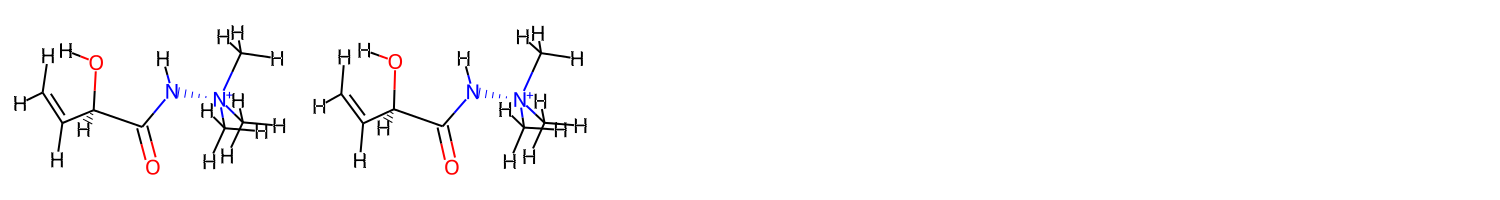

In [23]:
MolsToGridImage(mol+mol2, molsPerRow=5,subImgSize=(300,200))

In [24]:
with open("pickled_data/y_h_geom_comp_84.pkl", "wb") as file:
    pickle.dump(mol+mol2, file)

# Generate Ylide-Rad Starting point with Ylide-H optimized solution phase geometry

In [26]:
n=len(atom_coords_solv[2])
mols=[]
start=0
stop=100
for i in tqdm(range(start,stop)):

    try:
        charge=charges[2][i]
        make_xyz_from_array('temp_xyz',atom_coords_solv[2][i],atom_labels[2][i],include_charge=True,charge=charge)
        atoms, charge_read, coordinates = x2m.read_xyz_file('temp_xyz.xyz') 
        mol = x2m.xyz2mol(atoms, coordinates, charge=charge) #Can also use charge read defined on the previous line
        mols.append(mol[0])
        
    except Exception as e:
        #print(atom_labels)
        if 'P' in atom_labels[2][i] or 'S' in atom_labels[2][i]:
            print(f'{i}: MOL CONTAINS S or P')
            
        print(f'{i}: DIDNT WORK,ADDING [Ar]')
        mols.append(Chem.MolFromSmiles('[Ar]'))
        
        exc_type, exc_obj, exc_tb = sys.exc_info()
        fname = os.path.split(exc_tb.tb_frame.f_code.co_filename)[1]
        print(e)       
        print(exc_type, fname, exc_tb.tb_lineno)
    
    
if os.path.exists('temp_xyz.xyz'): #clean up temp xyz file
    os.remove('temp_xyz.xyz')
else:
    print("The file does not exist")

 27%|██▋       | 27/100 [00:01<00:30,  2.39it/s]

3: DIDNT WORK,ADDING [Ar]
not enough values to unpack (expected 2, got 1)
<class 'ValueError'> <ipython-input-26-06ee1d111a69> 9


100%|██████████| 100/100 [00:01<00:00, 65.05it/s]

68: DIDNT WORK,ADDING [Ar]
not enough values to unpack (expected 2, got 1)
<class 'ValueError'> <ipython-input-26-06ee1d111a69> 9
72: DIDNT WORK,ADDING [Ar]
not enough values to unpack (expected 2, got 1)
<class 'ValueError'> <ipython-input-26-06ee1d111a69> 9


# Remove H atom to form N radical

In [28]:
#Get the indices of the hydrogen and radicals 
new_ylide_rad_xyz=[]
ylide_count=0
H_remove_index=[]
N_index=[]
for i,m in enumerate(tqdm(mols)):
    
    for atom in m.GetAtoms():
        if atom.GetSymbol() == 'N':
            
            neighbors=atom.GetNeighbors()
            neighbor_symbols=[x.GetSymbol() for x in neighbors]
            
            if 'H' in neighbor_symbols and 'N' in neighbor_symbols and 'C' in neighbor_symbols: #Check that the correct neighbors are connected
                
                for n in neighbors:
                    if n.GetSymbol()=='N':
                        if n.GetFormalCharge()==1: #Make sure the connected N has a formal charge of 1

                            index=neighbor_symbols.index('H')
                            n_index=atom.GetIdx()

                            H_remove_index.append(neighbors[index].GetIdx())
                            N_index.append(n_index)

        if atom.GetSymbol() == 'Ar':
            H_remove_index.append(-1)
            N_index.append(-1)
    

100%|██████████| 100/100 [00:00<00:00, 445.92it/s]


In [15]:
#Remove hydrogen and make N a radical
#Need to update this to just generate the radical geometry.
ylide_rad_opt=[]
for i,h in enumerate(tqdm(H_remove_index[0:2000])):
    try:
        m=mols[i]
        m2=Chem.rdchem.RWMol(m)
        n_index=N_index[i]
        m2.GetAtomWithIdx(n_index).SetNumRadicalElectrons(1)
        m2.RemoveAtom(h)
        
        ylide_rad_opt.append(m2.GetMol())
        
    except Exception as e:
        print(f'Exception Found with {i}')
        ylide_rad_opt.append(Chem.MolFromSmiles('[Ar]'))
        exc_type, exc_obj, exc_tb = sys.exc_info()
        fname = os.path.split(exc_tb.tb_frame.f_code.co_filename)[1]
        print(e)       
        print(exc_type, fname, exc_tb.tb_lineno)

100%|██████████| 2000/2000 [00:00<00:00, 25909.48it/s]

Exception Found with 1366
Range Error
	idx
	Violation occurred on line 198 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 23 < 21
	RDKIT: 2021.03.4
	BOOST: 1_73

<class 'RuntimeError'> <ipython-input-15-8c48dfae6393> 10
Exception Found with 1367
Range Error
	idx
	Violation occurred on line 198 in file Code/GraphMol/ROMol.cpp
	Failed Expression: 25 < 24
	RDKIT: 2021.03.4
	BOOST: 1_73

<class 'RuntimeError'> <ipython-input-15-8c48dfae6393> 10


In [30]:
#Get xyz_coords
ylide_rad_xyz_coords=[]
for i,m in enumerate(tqdm(ylide_rad_opt)):
    try:
        mb=Chem.MolToMolBlock(m)
        xyz=GetCoordsFromMolBlock(mb)
        ylide_rad_xyz_coords.append(xyz)
    except Exception as e:
        print(i)

100%|██████████| 100/100 [00:01<00:00, 65.78it/s]


In [50]:
overwrite=True
if overwrite:
    with open("pickled_data/y_rad_from_y_h_xyz_solv.pkl", "wb") as file:
        pickle.dump(ylide_rad_xyz_coords, file)

In [51]:
with open("pickled_data/y_rad_from_y_h_xyz_solv.pkl","rb") as file:
    pickle_off = pickle.Unpickler(file)
    y_rad_from_y_h_solv = pickle_off.load()

# Make xyz files for y_rad gas from from optimized y_h solution geometries

In [52]:
actually_make_dirs=True
if actually_make_dirs:

    z=7
    cwd=os.getcwd()
    calc_folder='Calcs'

    functional='M062X'
    basis= 'Def2TZVP'
    solvorgas='solv'
    solvmethod='SMD'
    solvent='acetonitrile'
    smi_dict={''    :y,
          '_rad' : yr,
          '_h'   : yh
         }
    suffix= ['_rad']
    for i, s in enumerate(tqdm(range(100))):

        assert solvorgas == 'gas' or solvorgas=='solv','SOLVORGAS NOT SET TO A VALID VALUE'
        
        for j, suff in enumerate(suffix): 


            if solvorgas=='gas':

                basepath=f'{cwd}/{calc_folder}/{str(i).zfill(z)}/ylide{suff}/{functional}/{basis}/gas'

            elif solvorgas=='solv':

                try:
                    solvent
                except NameError:
                    raise Exception('PLEASE SPECIFY A SOLVENT')


                basepath=f'{cwd}/{calc_folder}/{str(i).zfill(z)}/ylide{suff}/{functional}/{basis}/{solvent}/{solvmethod}'


            os.makedirs(basepath,exist_ok=True)


            smi= smi_dict[suff][i]
            path=f'{basepath}/{str(i).zfill(z)}_ylide{suff}'

            try:        
                #mk_smi_file(smi,path)
                write_xyz_from_xyz_arr(y_rad_from_y_h_solv[i],f'{path}_y_h_opt')
                gaussian(f'{path}_y_h_opt',smi,functional=functional,basis=basis,solvorgas=solvorgas,solvmethod=solvmethod,solvent=solvent)
                gen_gauss_sub_script(f'{path}_y_h_opt')
            except Exception as e:
                print(e)
                exc_type, exc_obj, exc_tb = sys.exc_info()
                fname = os.path.split(exc_tb.tb_frame.f_code.co_filename)[1]
                print(exc_type, fname, exc_tb.tb_lineno)
                print(f'ERROR WITH  MOLECULE NUMBER {i} smiles {path}')

100%|██████████| 100/100 [00:11<00:00,  8.53it/s]
